In [15]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import xgboost as xgb




In [16]:
#=========================================================================
# read in the data
#=========================================================================
df = pd.read_csv('../data/curated/2017_2022_house_data_final.csv',index_col = 0)
#=========================================================================
# split the data
#=========================================================================
def split_train_test(data, test_ratio):

 shuffled_indicies = np.random.permutation(len(data))
 test_data_size = int(len(data) * test_ratio)
 test_indicies = shuffled_indicies[:test_data_size]
 train_indicies = shuffled_indicies[test_data_size:]
 return data.iloc[train_indicies], data.iloc[test_indicies]

train_data, test_data = split_train_test(df, 0.2)

In [17]:
train_data

,index,name,years,property_type,coordinates,postcode,sa2_coor,closest_sa2,bed,bath,car,Income,Population,week_rent,real_school_distance,real_school_duration,real_station_distance,real_station_duration,Hospital num
23214,23608,64 Dianne Avenue Craigieburn VIC 3064,2022,House,"[-37.59558430000001, 144.9313965]",3064,[xcoord 144.931046\nycoord -37.591818\nN...,Craigieburn - Central,3.0,1.0,2.0,54470.171429,8784.634397,390.0,211.8,134.1,1.6,3.8,1.0
20278,20650,606/605 St Kilda Road Melbourne VIC 3004,2022,Apartment / Unit / Flat,"[-37.85091269999999, 144.9814593]",3004,[xcoord 144.962928\nycoord -37.825860\nN...,South Yarra - West,2.0,1.0,1.0,158943.380952,7141.370794,550.0,0.8,1.5,1.3,2.9,2.0
18916,19262,"42 MCMEEKEN WAY, EPSOM",2021,Category : House,"(5078 -36.69032\nName: latitude, dtype: floa...",3551,[xcoord 144.678786\nycoord -36.888041\nN...,Rushworth,3.0,2.0,1.0,50530.600000,4166.000000,370.0,2.6,4.0,124.8,96.5,0.0
24100,24498,13A/116-130 Main Drive Macleod VIC 3085,2022,Studio,"[-37.7144842, 145.0607509]",3085,[xcoord 145.047452\nycoord -37.713461\nN...,Kingsbury,1.0,1.0,0.0,66185.819048,12472.044767,215.0,3.1,8.9,3.3,9.4,0.0
3651,3706,"23 ALEXANDRA STREET, THORNBURY",2018,Category : Rental_residential,"(817 -37.76244\nName: latitude, dtype: float...",3071,[xcoord 145.003999\nycoord -37.757827\nN...,Thornbury,3.0,1.0,2.0,68856.152381,19699.000000,590.0,0.4,1.4,1.3,2.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11900,12103,"30 BINBROOK DRIVE, CROYDON",2020,Category : House,"(1796 -37.785581\nName: latitude, dtype: flo...",3136,[xcoord 145.275103\nycoord -37.815109\nN...,Croydon - West,3.0,1.0,2.0,66212.523810,14542.000000,400.0,0.5,1.7,2.5,5.5,1.0
18455,18801,"7182 HENTY HIGHWAY, BRANXHOLME",2021,Category : House,"(4559 -37.831866\nName: latitude, dtype: flo...",3302,[xcoord 141.968491\nycoord -37.581185\nN...,Southern Grampians,3.0,1.0,3.0,43514.876190,6264.000000,240.0,7.2,5.7,289.3,208.0,0.0
1141,1142,"1/34 CAMPBELL STREET, HEATHMONT",2017,Category : Unit/apmt,"(1409 -37.821285\nName: latitude, dtype: flo...",3135,[xcoord 145.248031\nycoord -37.820857\nN...,Ringwood East,2.0,1.0,0.0,61092.457143,21312.000000,330.0,1.6,3.6,1.4,3.4,2.0
27424,27858,2/109 Nepean Highway Aspendale VIC 3195,2022,Townhouse,"[-38.02399399999999, 145.0996129]",3195,[xcoord 145.085968\nycoord -37.996532\nN...,Edithvale - Aspendale,3.0,3.0,2.0,81185.457143,14000.960405,100.0,1.5,2.3,0.6,1.0,0.0


In [18]:
#=========================================================================
# select feature
#=========================================================================
train_data = train_data.drop(['index', 'name', 'property_type', 'coordinates','sa2_coor', 'closest_sa2'], axis = 1)
train_data

,years,postcode,bed,bath,car,Income,Population,week_rent,real_school_distance,real_school_duration,real_station_distance,real_station_duration,Hospital num
23214,2022,3064,3.0,1.0,2.0,54470.171429,8784.634397,390.0,211.8,134.1,1.6,3.8,1.0
20278,2022,3004,2.0,1.0,1.0,158943.380952,7141.370794,550.0,0.8,1.5,1.3,2.9,2.0
18916,2021,3551,3.0,2.0,1.0,50530.600000,4166.000000,370.0,2.6,4.0,124.8,96.5,0.0
24100,2022,3085,1.0,1.0,0.0,66185.819048,12472.044767,215.0,3.1,8.9,3.3,9.4,0.0
3651,2018,3071,3.0,1.0,2.0,68856.152381,19699.000000,590.0,0.4,1.4,1.3,2.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11900,2020,3136,3.0,1.0,2.0,66212.523810,14542.000000,400.0,0.5,1.7,2.5,5.5,1.0
18455,2021,3302,3.0,1.0,3.0,43514.876190,6264.000000,240.0,7.2,5.7,289.3,208.0,0.0
1141,2017,3135,2.0,1.0,0.0,61092.457143,21312.000000,330.0,1.6,3.6,1.4,3.4,2.0
27424,2022,3195,3.0,3.0,2.0,81185.457143,14000.960405,100.0,1.5,2.3,0.6,1.0,0.0


In [19]:
#=========================================================================
# select feature
#=========================================================================
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['week_rent'], axis=1)
y_train = train_data["week_rent"]
X_test  = test_data.select_dtypes(include=['number']).copy()

In [20]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: Future

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 700}


In [21]:
X_train

,years,postcode,bed,bath,car,Income,Population,real_school_distance,real_school_duration,real_station_distance,real_station_duration,Hospital num
23214,2022,3064,3.0,1.0,2.0,54470.171429,8784.634397,211.8,134.1,1.6,3.8,1.0
20278,2022,3004,2.0,1.0,1.0,158943.380952,7141.370794,0.8,1.5,1.3,2.9,2.0
18916,2021,3551,3.0,2.0,1.0,50530.600000,4166.000000,2.6,4.0,124.8,96.5,0.0
24100,2022,3085,1.0,1.0,0.0,66185.819048,12472.044767,3.1,8.9,3.3,9.4,0.0
3651,2018,3071,3.0,1.0,2.0,68856.152381,19699.000000,0.4,1.4,1.3,2.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11900,2020,3136,3.0,1.0,2.0,66212.523810,14542.000000,0.5,1.7,2.5,5.5,1.0
18455,2021,3302,3.0,1.0,3.0,43514.876190,6264.000000,7.2,5.7,289.3,208.0,0.0
1141,2017,3135,2.0,1.0,0.0,61092.457143,21312.000000,1.6,3.6,1.4,3.4,2.0
27424,2022,3195,3.0,3.0,2.0,81185.457143,14000.960405,1.5,2.3,0.6,1.0,0.0


In [22]:
y_true = X_test['week_rent']

In [23]:
X_test = X_test.drop(['index','week_rent'], axis = 1)

In [24]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
predictions = regressor.predict(X_test)

/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


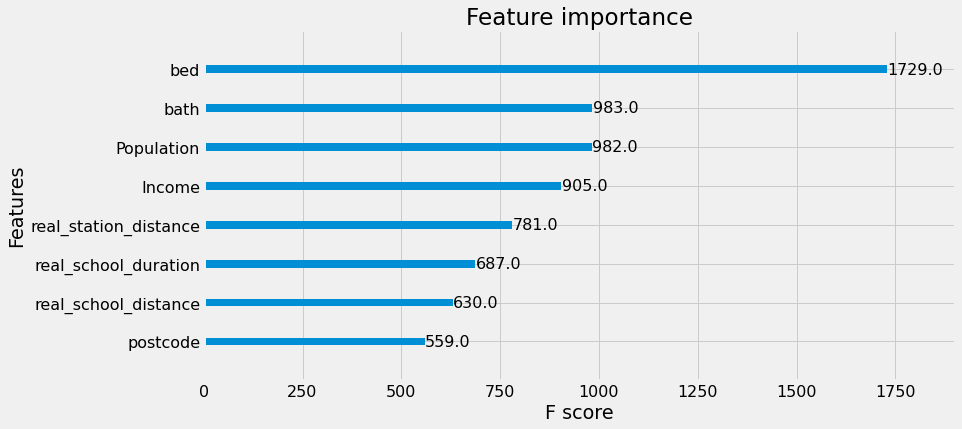

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show()

In [29]:
future_df = pd.read_csv('../data/curated/2023_2025_house_data_final.csv',index_col = 0)
X = future_df.drop(['name', 'property_type', 'coordinates','sa2_coor', 'closest_sa2','week_rent'], axis = 1)

In [30]:

#=========================================================================
# use the model to predict the prices for the future data
#=========================================================================
predictions = regressor.predict(X)

In [31]:
future_df['week_rent'] = predictions

In [33]:
future_df.to_csv('../data/curated/XGBoost prediction.csv')


